## Random Forest

As we have already seen in decision trees, overfitting is a major problem.We used pruining to reduce overfitting and getting a good decision tree.<br>
As decision tree keep expanding till it runs out of features or till it finds a pure node, therefore there are very high chances of overfitting on the training data. Decision tree will split on the nodes that are not actually important if it is favourable. This causes decision trees to perform perfectly on training data but sometimes fail on testing data. Pruning definately helps to some extent but even it does not consider how important a feature is. Decision tree may be going to a direction on the basis of some useless features at the starting levels of the tree and thus it effects the decision. For example, in our previous example of predicting that if a candidate gets an interview call based upon his/her resume we also include the features like: resume has a picture of the candidate , colours used in the resume and no. of pages resume has. These features mentioned are comparitively very useless as compared to our earlier features (which were projects, college and internship). But there can be a case where  our data-set has positive results corresponding to blue colour of resume and resume having the applicant's picture. Therefore, our decision tree may have these as deciding features and gives true as soon as these two are present in a particular resume. Pruning may improve the error but error will still remain. Random forest is a nice way to counter this situation. 

Random forest is another way to reduce overfitting in decision trees and it can also be used to find importance of features we are using.<br>
Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. Each decision tree built will have a randomly selected set of features and randomly selected set of data points. Number of features in each decision tree in the forest will be less than the total number of features we have in our dataset. So if we have a feature 'A', it may appear in some of the decision trees of the forest and not in the other. Duplication is generally allowed in selecting the data-points from our data-set for the decision trees in the forest.
<img src="RF1.png"><br>
As shown above, some of the trees have features F1 and F2 but not F3. There is no point of repeating a feature in a decision tree of the forest but as shown data point may be duplicate. This randomness in selecting the features and data-points helps in reducing overfitting. Note that we will make multiple decision trees so that there is very less chance of a feature/data-point getting missed out.<br>
Random forest consists of many decision tress. Final answer of prediction is the majority of the answers from decision trees of the forest.
<b>We will see some of these features of the random forest in detail below.</b>


### Bagging training data & selecting features at random

Bagging (Bootstrap Aggregation) is used when our goal is to reduce the variance of a decision tree. Bagging is a general purpose procedure for reducing the variance of a predictive model. When applied to trees the basic idea is to grow multiple trees which are then combined to give a single prediction. Combining multiple trees help in improving precision and accuracy at the expense of some loss of interpretation. <br>
In bagging, we take multiple smaller data-sets in which we also allow repetition of data points and randomly select some features. Bagging is generally done in referance of data-points.
<img src="bagging.png"><br>
As shown in the diagram above we have created multiple data-sets from the original dataset shown as D1,D2 etc. Classifiers C1,C2 etc are actually individual trees in our forest. To find the final answer we just take majority of the answers given by trees in the forest.<br> These smaller data-sets are obtained by choosing the data-points and the features in the following manner:
<br>->  <b>Features</b> are selected at random <b>without</b> repetiton<br>
->  <b>Data-points</b> are selected at random <b>with</b> repetition(which is actually bagging)<br>
<br>When doing bagging, we must be sure that no data point is left out. Increasing the number of trees in the random forest reduces the chances of missing out on any data point significantly. Same goes for the features. As already discussed, selecting features in random forest helps us in knowing the relative importance of each feature.
<br><br>Let’s look at the steps taken to implement Random forest:
<br>1. Suppose there are <b>N observations</b> and <b>M features</b> in training data set. First, a sample from training data set is taken randomly with replacement.
<br>2. A subset of M features are selected randomly and whichever feature gives the best split is used to split the node iteratively to form the tree (as done in decision tree building).
<br>3. The tree is grown to the largest (without pruning).
<br>4. Above steps are repeated and prediction is given based on the aggregation of predictions from multiple trees which are built the same way.



### Extra Trees

The Extra-Tree method stands for <b>ext</b>remely <b>ra</b>ndomized <b>t</b>rees. With respect to random forests, the method drops the idea of using bootstrap copies of the learning sample, and instead of trying to find an optimal cut-point for each one of the K randomly chosen features at each node, it selects a cut-point at random.
<br>In the implementation of Random Forest, we randomly select some features from the main data-set. Then for these randomly selected features we make a decision tree. The decision Tree is made by calculating which feature should be selected to split at a particular node. The cost of choosing each feature was calculated and the feature which gave the least cost was selected. Multiple trees were made using the same approach to form a forest.
<br>In the Extra Trees approach, we do not choose the features randomly to form a tree. We take all the features to form a tree. This is the first difference. The second one is in selecting the feature to split the data points at each node. Rather than considering the cost due to taking a certain feature to split Extra Trees just pick a feature at random. So in this case, any two trees will be different in terms of the feature selected to partition the data-points at each node. It is quite possible in both the approaches discussed that there exists a pair of trees that are exactly same. 
<br>We can combine  Extra Trees approach with Random forests as well. This can be done by selecting randomly some features as Random forest does and then applying Extra Trees to this feature subset and make multiple Trees out of the bootstraped data-set formed.

<img src="extra_Trees.png">
As shown in the image above, data-set is first converted into everal bootstrap data-sets and then Extra Trees are made for each of these bootstrap data-sets.
<br><br>We have an inbuilt Classifier for Extra Trees in sklearn as sklearn.tree.ExtraTreeClassifier. More information about it is available at [sklearn.tree.ExtraTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html).

### SKLEARN CODE FOR RANDOM FOREST 
AND FEATURE SELECTION USING RANDOM FORESTS

Feature selection is picking only useful features that makes up major contribution in the output.
Advantages of feature selection are as follows :

1. Reduces Overfitting
2. Improves accuracy of the model
3. Reduces training time

If we have too many irrelevant features, the accuracy of our classifier decreases. <br/>
Random Forests can be used for determing the importance of each feature and then picking up only important and useful features.

In [3]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets,tree
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [4]:
iris = datasets.load_iris()
features = iris.feature_names
X = iris.data
Y = iris.target

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [6]:
# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

In [7]:
# Train the classifier
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [8]:
clf.score(X_test, Y_test)

0.9333333333333333

In [9]:
feature_importances = pd.DataFrame(clf.feature_importances_, index = features, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
petal length (cm),0.450281
petal width (cm),0.423221
sepal length (cm),0.110243
sepal width (cm),0.016255


This shows that <b>petal length</b> and <b>petal width</b> are important features as compared to the other two features i.e. <b>sepal length</b> and <b>sepal width</b>.

In [10]:
# Making a classifier picking only important features, 
# picking only those features that have importance value greater than 0.15

In [11]:
sfm = SelectFromModel(clf, threshold = 0.15)

In [12]:
sfm.fit(X_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.15)

In [13]:
# Create a data subset picking only important features out of all the features.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [14]:
X_important_train.shape

(90, 2)

In [15]:
X_important_test.shape

(60, 2)

In [16]:
# New random forest classifier with only important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

In [17]:
clf_important.fit(X_important_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [18]:
clf_important.score(X_important_test, Y_test)

0.8833333333333333

There is a loss in accuracy of the model, since we have taken up only important features while training the model.

In [ ]:
clf.estimators_

<class 'list'>


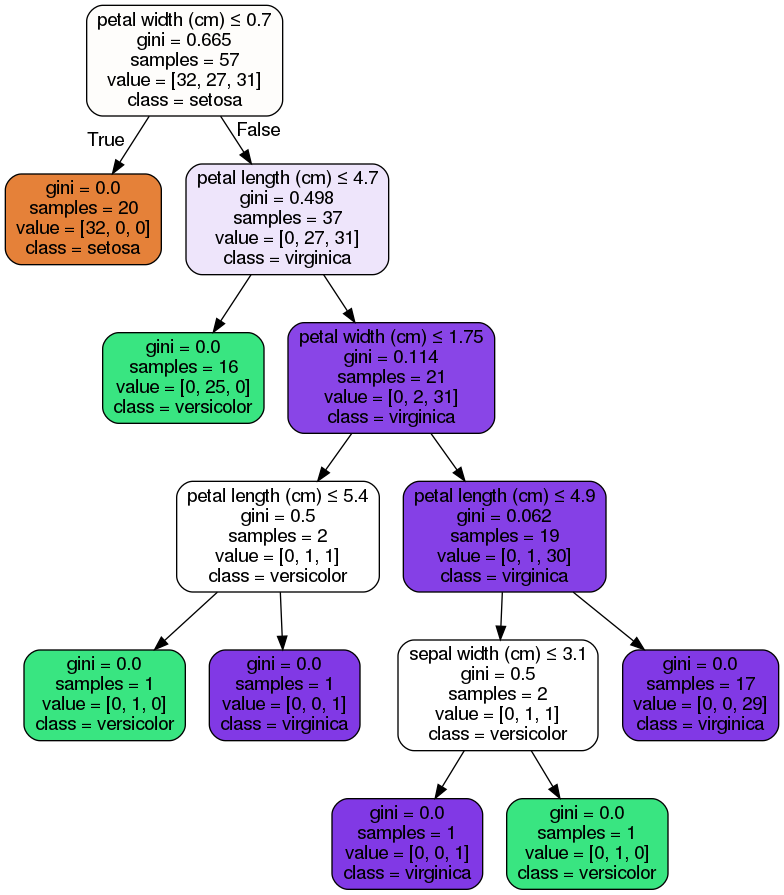

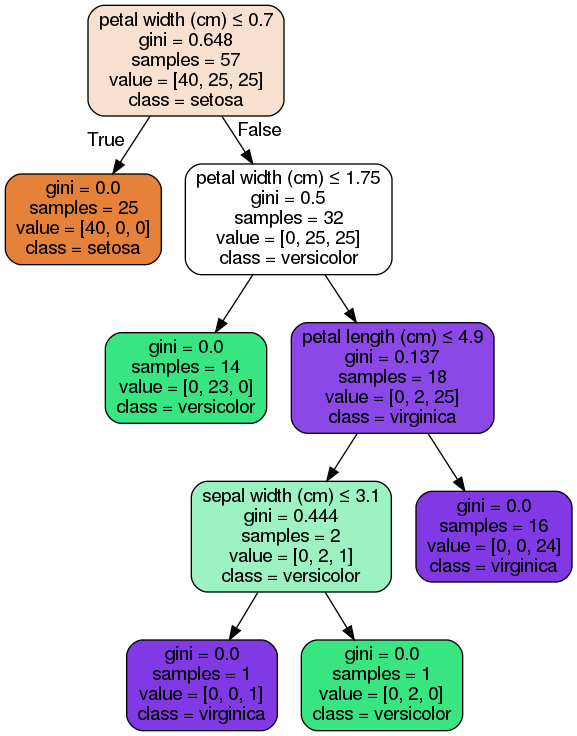

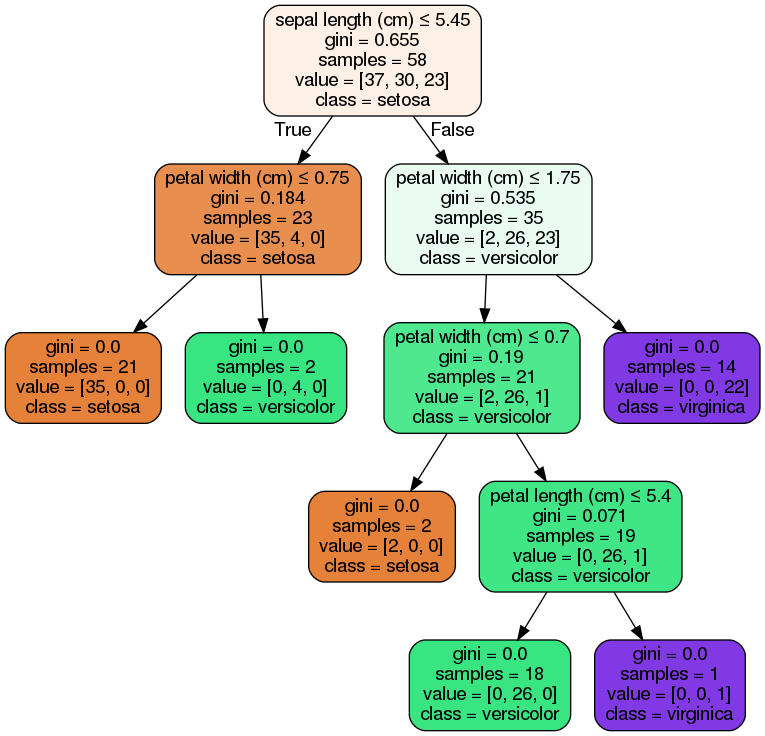

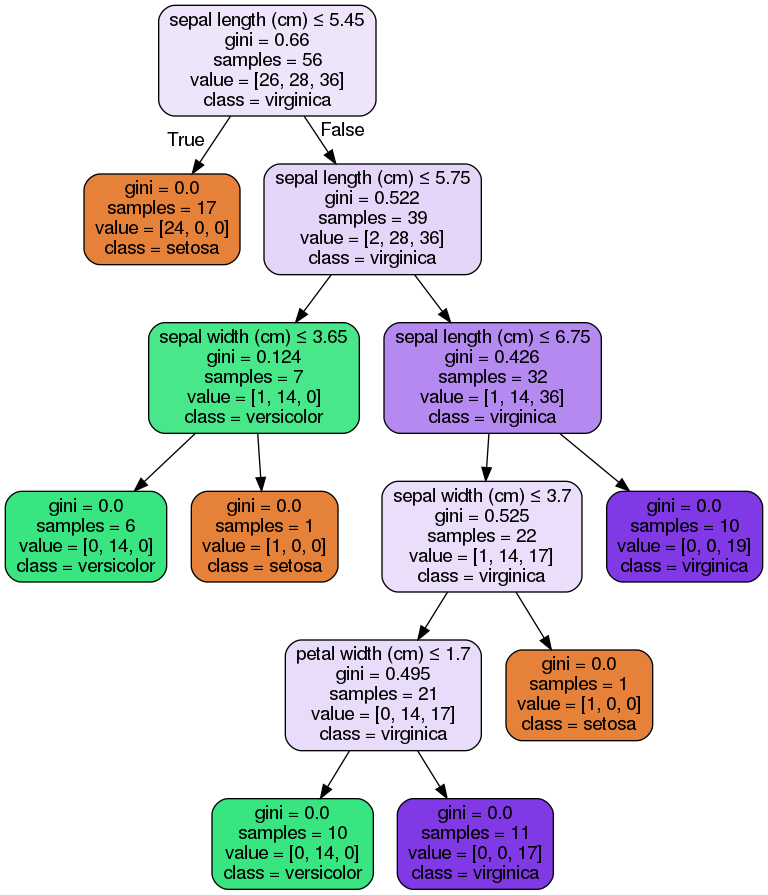

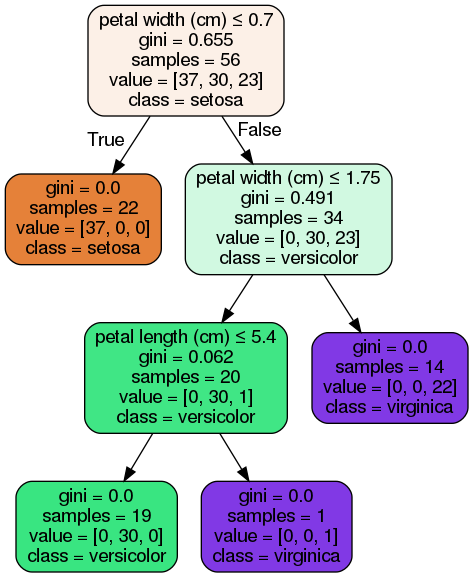

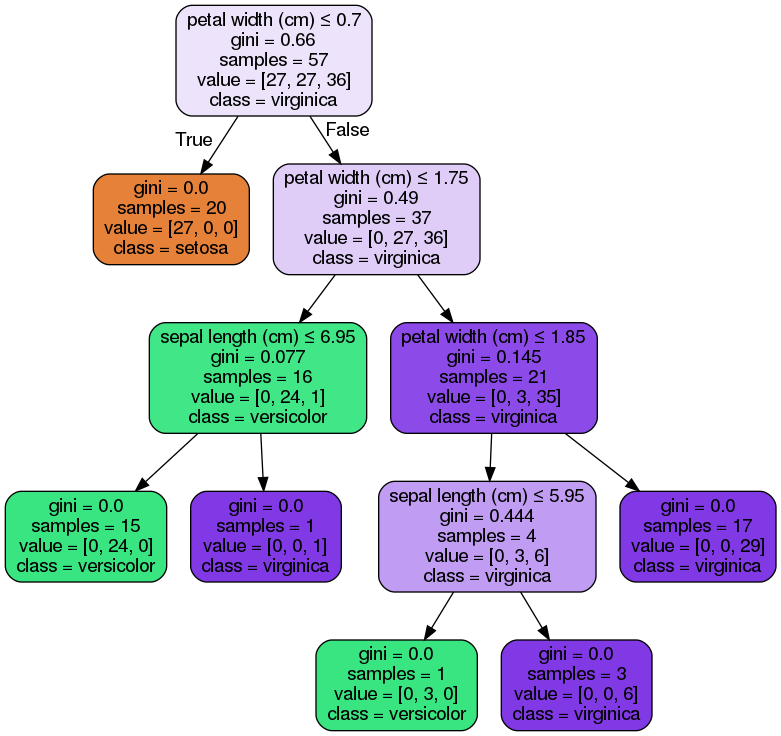

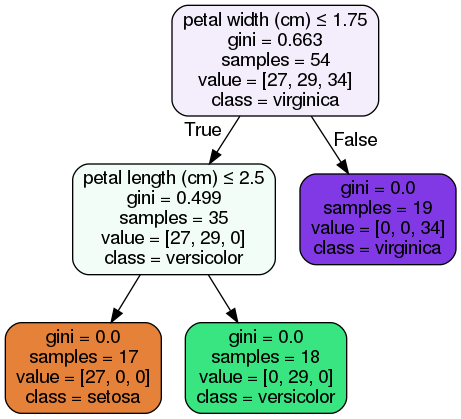

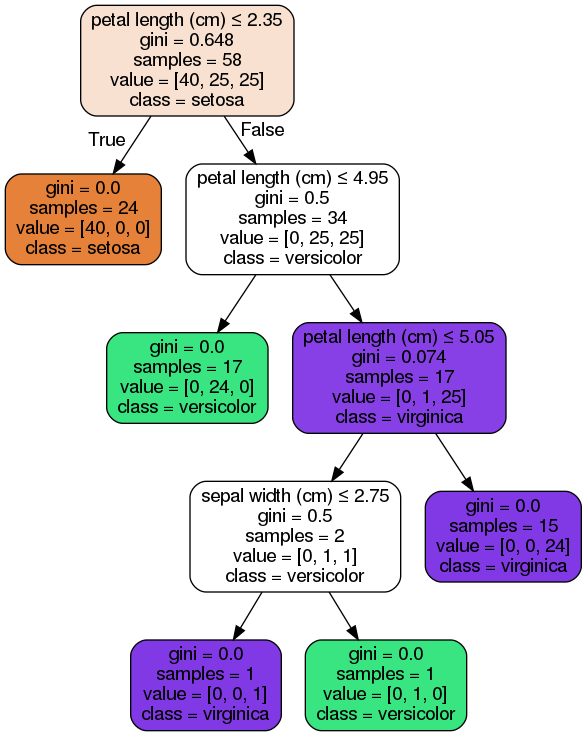

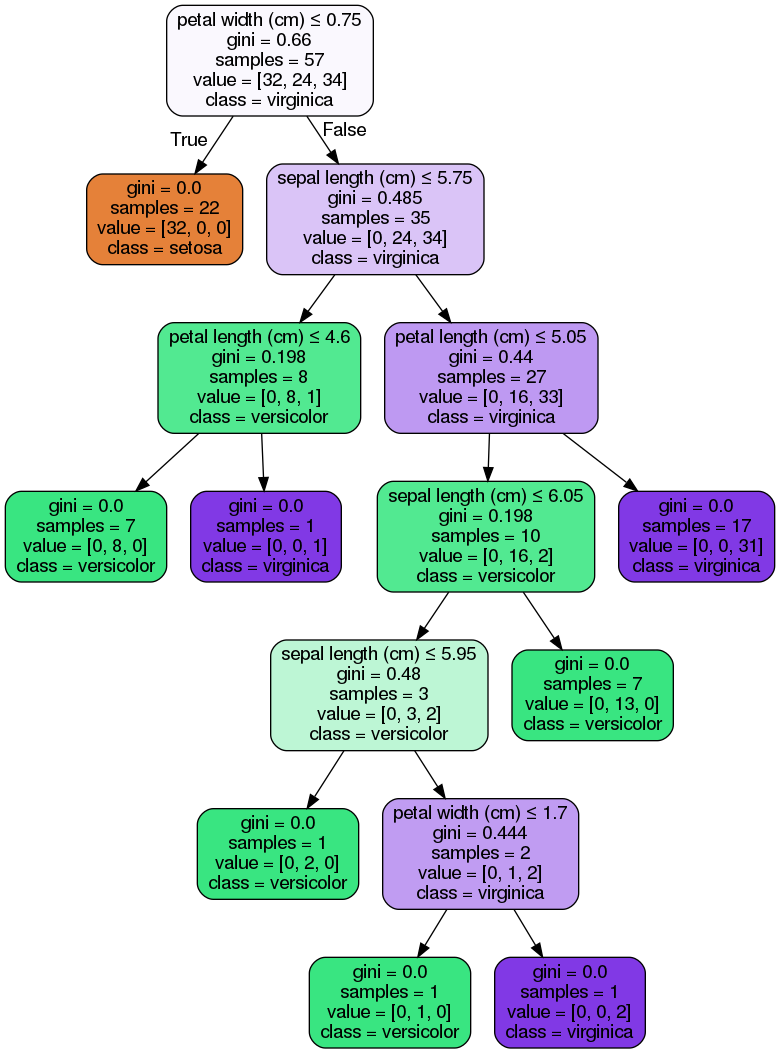

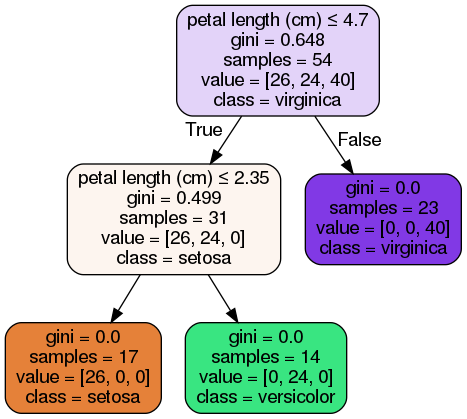

In [22]:
from IPython.display import display
import time

clf_new = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)
clf_new.fit(X_train, Y_train)

print(type(clf.estimators_))
counter = 0

for treeInForest in clf_new.estimators_:
    dot_data = StringIO()

    tree.export_graphviz(treeInForest,out_file = dot_data, feature_names = features, filled = True, rounded = True,special_characters = True
                    , class_names = iris.target_names)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    
    ImageObject = Image(graph.create_png())

    graph.write_png(str(counter) + "DT.png")
    display(ImageObject)
    #graph
    print(graph)
    
    counter += 1